1. Importing libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Loading data from files:

In [4]:
# Loading the data from applications.csv and industries.csv
applications_df = pd.read_csv ('applications(2.0).csv')
industries_df = pd.read_csv ('industries(2.0).csv')

3. Data cleaning:

In [6]:
# Removing duplicates from the applicant_id column
applications_df = applications_df.drop_duplicates(subset = 'applicant_id')

In [7]:
# Filling missing values ​​in the 'External Rating' field with 0
applications_df['External Rating'] = applications_df['External Rating'].fillna(0)

In [8]:
# Filling missing values ​​in the 'Education level' field with the text "Середня"
applications_df['Education level'] = applications_df['Education level'].fillna('Середня')

4. Merging applications_df with industries_df:

In [10]:
#  Merging DataFrames: applications_df with industries_df on 'Industry' column
applications_df = applications_df.merge(industries_df, how = 'left', on = 'Industry')

5. Calculation of the application rating:

In [12]:
# Initialize a 'Rating' column with zeros
applications_df['Rating'] = 0

In [13]:
# Add 20 points if the applicant's age is between 35 and 55
applications_df['Rating'] += ((applications_df['Age']>=35)&(applications_df['Age']<=55))*20

In [14]:
# Extract the 'Applied date' from 'Applied at' for further checking the day of week
applications_df[['Applied date', 'Time']] = applications_df['Applied at'].str.split(pat = ' ', expand = True)
applications_df.drop(labels='Time', axis = 1, inplace = True)
applications_df['Applied date'] = pd.to_datetime(applications_df['Applied date'])

In [15]:
# Add 20 points if the application was not submitted on a weekend
applications_df['Rating'] += (applications_df['Applied date'].dt.dayofweek <= 4) * 20

In [16]:
# Add 20 points if the applicant is married
applications_df['Rating'] += (applications_df['Marital status'] == 'Married') * 20

In [17]:
# Add 10 points if the applicant is located in "Київ чи область"
applications_df['Rating'] += (applications_df['Location'] == 'Київ чи область') * 10

In [18]:
# Add the 'Score' value from the industries.csv table to the rating
applications_df['Rating'] += applications_df ['Score']

In [19]:
# If 'External Rating' is greater than or equal to 7, 20 points are added to the rating
applications_df['Rating'] += (applications_df['External Rating'] >= 7) *20

In [20]:
# If 'External Rating' is less than or equal to 2, 20 points are deducted from the rating
applications_df['Rating']-= (applications_df['External Rating'] <= 2) * 20

In [21]:
# Ensure the rating is between 0 and 100
applications_df['Rating'] = np.clip (applications_df['Rating'], 0, 100)

In [22]:
# Set the rating to 0 if 'Amount' is missing or 'External Rating' is 0
applications_df['Rating'] = np.where ((pd.isna(applications_df['Amount']))| (applications_df['External Rating']) == float(0),
                                   0,
                                   applications_df['Rating'] )

6. Filtering applications with a rating greater than zero:

In [24]:
# Creation of Data Frame from applications with a rating greater than zero
accepted_applications = applications_df[applications_df['Rating']>0]

7. Grouping data by the week of application submission and output to the lineplot and histogram:

In [26]:
# Creation of a column with the week of application submission
accepted_applications['Application week'] = accepted_applications['Applied date'].dt.to_period('W').apply(lambda r: f"{r.start_time.year}-{r.start_time.strftime('%W')}")

C:\Users\Yana Vasylieva\AppData\Local\Temp\ipykernel_74480\1520911082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_applications['Application week'] = accepted_applications['Applied date'].dt.to_period('W').apply(lambda r: f"{r.start_time.year}-{r.start_time.strftime('%W')}")


In [27]:
# Grouping by application week and calculation of average rating
accepted_applications_by_week = accepted_applications.pivot_table(values = 'Rating', index = 'Application week', aggfunc = lambda x: np.round(np.mean(x), 2)).reset_index()

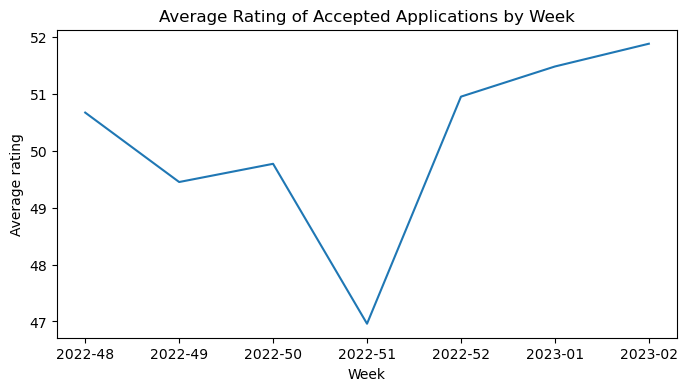

In [28]:
# Visualize the average rating of accepted applications by week
plt.figure (figsize = (8, 4), dpi = 100)
sns.lineplot (data = accepted_applications_by_week, x = 'Application week', y = 'Rating')
plt.title('Average Rating of Accepted Applications by Week')
plt.xlabel('Week')
plt.ylabel('Average Rating')
plt.ylabel ('Average rating')
plt.show()

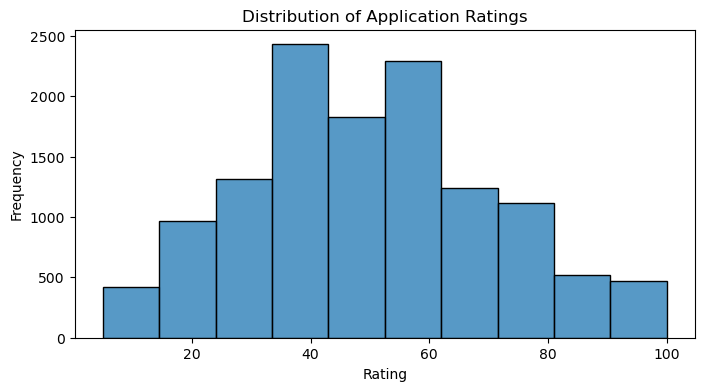

In [29]:
# Visualize the distribution of ratings
plt.figure (figsize = (8, 4), dpi = 100)
sns.histplot(accepted_applications['Rating'], bins=10)
plt.title('Distribution of Application Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()